In [1]:
import pandas as pd
import numpy as np

In [2]:
data = { 
    'Student_ID': ['S001','S002','S003','S004','S005','S006','S006'],
    'Gender': ['Male','Female','Male','Female','Male','Female','Female'], 
    'Age': [20,21,20,22,21,23,23], 'Marks': [85,90,np.nan,75,85,88,88],
    'Attendance': [90,95,85,80,90,92,92], 
    'Subject': ['Math','Science','Math','English','Science','Math','Math']
}

In [13]:
df=pd.DataFrame(data)
df

,Student_ID,Gender,Age,Marks,Attendance,Subject
0,S001,Male,20,85.0,90,Math
1,S002,Female,21,90.0,95,Science
2,S003,Male,20,NaN,85,Math
3,S004,Female,22,75.0,80,English
4,S005,Male,21,85.0,90,Science
5,S006,Female,23,88.0,92,Math
6,S006,Female,23,88.0,92,Math


In [14]:
#Display first five rows
df.head()

,Student_ID,Gender,Age,Marks,Attendance,Subject
0,S001,Male,20,85.0,90,Math
1,S002,Female,21,90.0,95,Science
2,S003,Male,20,NaN,85,Math
3,S004,Female,22,75.0,80,English
4,S005,Male,21,85.0,90,Science


In [15]:
#Display Dataset Shape
df.shape


(7, 6)

In [16]:
#Display Data Types
df.dtypes

Student_ID        str
Gender            str
Age             int64
Marks         float64
Attendance      int64
Subject           str
dtype: object

In [17]:
#Identify Missing Values
df.isnull().sum()

Student_ID    0
Gender        0
Age           0
Marks         1
Attendance    0
Subject       0
dtype: int64

In [18]:
#Replace Missing Marks with Mean
#Step 1: Find Mean
df['Marks'].mean()

np.float64(85.16666666666667)

In [48]:
#Step 2: Fill Missing Value
df['Marks'].fillna(df['Marks'].mean(), inplace=True) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8196\2035891395.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Marks'].fillna(df['Marks'].mean(), inplace=True)


0    85.0
1    90.0
2    84.6
3    75.0
4    85.0
5    88.0
Name: Marks, dtype: float64

In [20]:
# Remove Duplicate Rows
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(6, 6)

In [22]:
#Normalize Marks using Min-Max Normalization
#Step 1: Apply Formula
df['Marks_Normalized'] = (df['Marks'] - df['Marks'].min()) / (df['Marks'].max() - df['Marks'].min())

In [23]:
df

,Student_ID,Gender,Age,Marks,Attendance,Subject,Marks_Normalized
0,S001,Male,20,85.0,90,Math,0.666667
1,S002,Female,21,90.0,95,Science,1.000000
2,S003,Male,20,NaN,85,Math,NaN
3,S004,Female,22,75.0,80,English,0.000000
4,S005,Male,21,85.0,90,Science,0.666667
5,S006,Female,23,88.0,92,Math,0.866667


In [24]:
#Mean
df['Marks'].mean()

np.float64(84.6)

In [25]:
#Median
df['Marks'].median()

np.float64(85.0)

In [26]:
#Mode
df['Marks'].mode()

0    85.0
Name: Marks, dtype: float64

In [27]:
#Variance
df['Marks'].var()

np.float64(33.300000000000004)

In [28]:
#Standard Deviation
df['Marks'].std()

np.float64(5.770615218501404)

In [29]:
#Frequency Count of Subjects
df['Subject'].value_counts()

Subject
Math       3
Science    2
English    1
Name: count, dtype: int64

In [30]:
#Frequency Count of Gender
df['Gender'].value_counts()

Gender
Male      3
Female    3
Name: count, dtype: int64

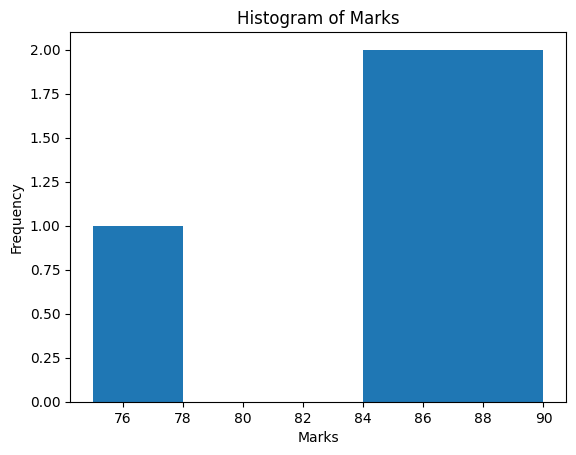

In [31]:
#Histogram (Marks Distribution)
import matplotlib.pyplot as plt

plt.hist(df['Marks'], bins=5)
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.title("Histogram of Marks")
plt.show()

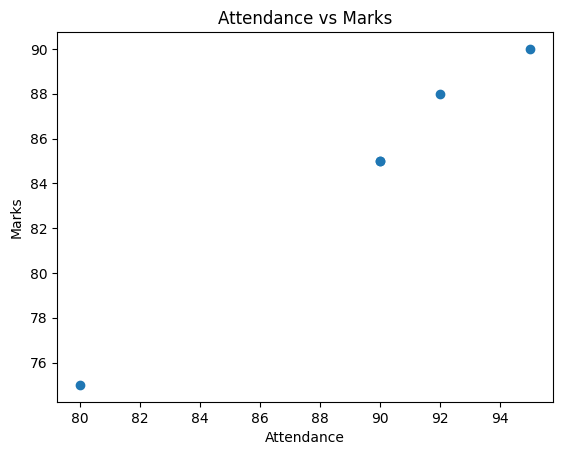

In [32]:
#Scatter Plot (Marks vs Attendance)
plt.scatter(df['Attendance'], df['Marks'])
plt.xlabel("Attendance")
plt.ylabel("Marks")
plt.title("Attendance vs Marks")
plt.show()

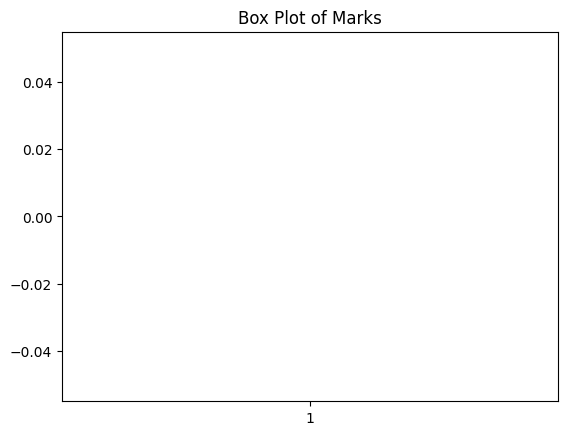

In [34]:
#Box Plot (Marks)
plt.boxplot(df['Marks'])
plt.title("Box Plot of Marks")
plt.show()

In [35]:
#Correlation & Covariance

df[['Marks','Attendance']].corr()
#If attendance increases → marks also increase


,Marks,Attendance
Marks,1.000000,0.997193
Attendance,0.997193,1.000000


In [36]:
#Covariance
df[['Marks','Attendance']].cov()

,Marks,Attendance
Marks,33.30,32.450000
Attendance,32.45,28.666667


In [58]:
df["Marks"].cov(df["Attendance"])

np.float64(0.14422222222222222)

In [60]:
np.cov(df["Marks"],df["Attendance"])

array([[       nan,        nan],
       [       nan, 0.12740741]])

In [62]:
np.corrcoef(df["Marks"],df["Attendance"])

array([[nan, nan],
       [nan,  1.]])

In [37]:
#Average Marks by Subject
df.groupby('Subject')['Marks'].mean()

Subject
English    75.0
Math       86.5
Science    87.5
Name: Marks, dtype: float64

In [38]:
#Average Attendance by Gender
df.groupby('Gender')['Attendance'].mean()

Gender
Female    89.000000
Male      88.333333
Name: Attendance, dtype: float64

In [43]:
freq = df["Marks"].value_counts()
freq

Marks
85.0    2
90.0    1
75.0    1
88.0    1
Name: count, dtype: int64

In [44]:
#Grouped frequency distribution on large dataset
bins = [0,20,40,60,80,100]
labels = ["0-20","21-40","41-60","61-80","81-100"]
df["Class Interval"] = pd.cut(df["Marks"], bins=bins, labels=labels)
df

,Student_ID,Gender,Age,Marks,Attendance,Subject,Marks_Normalized,Class Interval
0,S001,Male,20,85.0,90,Math,0.666667,81-100
1,S002,Female,21,90.0,95,Science,1.000000,81-100
2,S003,Male,20,NaN,85,Math,NaN,NaN
3,S004,Female,22,75.0,80,English,0.000000,61-80
4,S005,Male,21,85.0,90,Science,0.666667,81-100
5,S006,Female,23,88.0,92,Math,0.866667,81-100


In [45]:
grouped_freq = df["Class Interval"].value_counts().sort_index()
grouped_freq

Class Interval
0-20      0
21-40     0
41-60     0
61-80     1
81-100    4
Name: count, dtype: int64

In [46]:
df.describe()

,Age,Marks,Attendance,Marks_Normalized
count,6.000000,5.000000,6.000000,5.000000
mean,21.166667,84.600000,88.666667,0.640000
std,1.169045,5.770615,5.354126,0.384708
min,20.000000,75.000000,80.000000,0.000000
25%,20.250000,85.000000,86.250000,0.666667
50%,21.000000,85.000000,90.000000,0.666667
75%,21.750000,88.000000,91.500000,0.866667
max,23.000000,90.000000,95.000000,1.000000


In [49]:
#handling duplicates
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [50]:
df.duplicated(subset=["Marks"])

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [52]:
df["Attendance"].value_counts()    #shows no of duplicates

Attendance
90    2
95    1
85    1
80    1
92    1
Name: count, dtype: int64

In [55]:
#Min-max normalization
df_c = df.copy()
df_c["Marks"] = (df["Marks"]-df["Marks"].min())/(df["Marks"].max()-df["Marks"].min())
df_c["Attendance"] = (df["Attendance"]-df["Attendance"].min())/(df["Attendance"].max()-df["Attendance"].min())
df_c

,Student_ID,Gender,Age,Marks,Attendance,Subject,Marks_Normalized,Class Interval
0,S001,Male,20,0.666667,0.666667,Math,0.666667,81-100
1,S002,Female,21,1.000000,1.000000,Science,1.000000,81-100
2,S003,Male,20,NaN,0.333333,Math,NaN,NaN
3,S004,Female,22,0.000000,0.000000,English,0.000000,61-80
4,S005,Male,21,0.666667,0.666667,Science,0.666667,81-100
5,S006,Female,23,0.866667,0.800000,Math,0.866667,81-100


In [56]:
#Z-score normalization(Standardization)
df_std = df.copy()
df_std["Marks"] = (df_std["Marks"]-df_std["Marks"].mean())/df_std["Marks"].std()
df_std["Attendance"] = (df_std["Attendance"]-df_std["Attendance"].mean())/df_std["Attendance"].std()
df_std

,Student_ID,Gender,Age,Marks,Attendance,Subject,Marks_Normalized,Class Interval
0,S001,Male,20,0.069317,0.249029,Math,0.666667,81-100
1,S002,Female,21,0.935775,1.182888,Science,1.000000,81-100
2,S003,Male,20,NaN,-0.684830,Math,NaN,NaN
3,S004,Female,22,-1.663601,-1.618689,English,0.000000,61-80
4,S005,Male,21,0.069317,0.249029,Science,0.666667,81-100
5,S006,Female,23,0.589192,0.622573,Math,0.866667,81-100


In [57]:
#Normalize multiple columns at once
cols = ["Marks","Attendance"]

df[cols] = (df[cols]-df[cols].min())/(df[cols].max()-df[cols].min())
df

,Student_ID,Gender,Age,Marks,Attendance,Subject,Marks_Normalized,Class Interval
0,S001,Male,20,0.666667,0.666667,Math,0.666667,81-100
1,S002,Female,21,1.000000,1.000000,Science,1.000000,81-100
2,S003,Male,20,NaN,0.333333,Math,NaN,NaN
3,S004,Female,22,0.000000,0.000000,English,0.000000,61-80
4,S005,Male,21,0.666667,0.666667,Science,0.666667,81-100
5,S006,Female,23,0.866667,0.800000,Math,0.866667,81-100


In [63]:
#Groupby -> Split-Apply-combine
#avg marks per subject
df.groupby("Subject")["Marks"].mean()

Subject
English    0.000000
Math       0.766667
Science    0.833333
Name: Marks, dtype: float64

In [64]:
# mean min max count
df.groupby("Subject")["Marks"].agg(["mean","min","max","count"])

,mean,min,max,count
Subject,,,,
English,0.000000,0.000000,0.000000,1
Math,0.766667,0.666667,0.866667,2
Science,0.833333,0.666667,1.000000,2


In [66]:
#groupby multiple columns
df.groupby(["Subject","Attendance"])["Marks"].mean()

Subject  Attendance
English  0.000000      0.000000
Math     0.333333           NaN
         0.666667      0.666667
         0.800000      0.866667
Science  0.666667      0.666667
         1.000000      1.000000
Name: Marks, dtype: float64

In [67]:
df["Marks_per_Attendance"]=df["Marks"]/df["Attendance"]
df.groupby("Subject")["Marks_per_Attendance"].mean()

Subject
English         NaN
Math       1.041667
Science    1.000000
Name: Marks_per_Attendance, dtype: float64

In [68]:
df.groupby("Subject").agg(
    Avg_Marks = ("Marks","mean"),
    Max_Marks = ("Marks","max"),
    Avg_Hours = ("Attendance","mean")
)

,Avg_Marks,Max_Marks,Avg_Hours
Subject,,,
English,0.000000,0.000000,0.000000
Math,0.766667,0.866667,0.600000
Science,0.833333,1.000000,0.833333


In [69]:
#reset index
summary = df.groupby("Subject")["Marks"].mean().reset_index()
summary

,Subject,Marks
0,English,0.000000
1,Math,0.766667
2,Science,0.833333


In [70]:
df.reset_index()

,index,Student_ID,Gender,Age,Marks,Attendance,Subject,Marks_Normalized,Class Interval,Marks_per_Attendance
0,0,S001,Male,20,0.666667,0.666667,Math,0.666667,81-100,1.000000
1,1,S002,Female,21,1.000000,1.000000,Science,1.000000,81-100,1.000000
2,2,S003,Male,20,NaN,0.333333,Math,NaN,NaN,NaN
3,3,S004,Female,22,0.000000,0.000000,English,0.000000,61-80,NaN
4,4,S005,Male,21,0.666667,0.666667,Science,0.666667,81-100,1.000000
5,5,S006,Female,23,0.866667,0.800000,Math,0.866667,81-100,1.083333


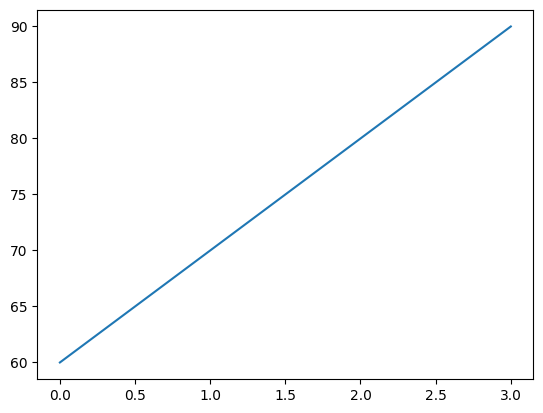

In [71]:
# Matplotlib 
marks = [60, 70, 80, 90]
plt.plot(marks)
plt.show()